In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: An Artifical Neuron

In this exercise, we will learn about a new class of machine learning algorithms inspired by the brain.

We will start by defining a few building blocks for these algorithms, and draw connections to neuroscience.

# Review: Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \underbrace{\text{Training Dataset}}_\text{Attributes + Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

Where does the dataset come from?

# Review: Binary Classification

In supervised learning, we fit a model of the form
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

In classification, the space of targets $\mathcal{Y}$ is *discrete*. Classification is binary if $\mathcal{Y} = \{0,1\}$

Each value of $y$ value is a *class* and we are interested in finding a hyperplane that separates the different classes.

# Review: Logistic Regression

Logistic regression fits a model of the form
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is known as the *sigmoid* or *logistic* function.

Please visualize the logistic function from -5 to 5.

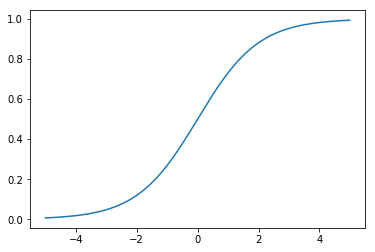

In [10]:
# your code here
z = np.arange(-5, 5, 0.01)
sigma = 1/(1+np.exp(-z))

plt.plot(z, sigma)

# A Biological Neuron

In order to define an artifical neuron, let's look first a biological one.
<table style="border:none;">
    <tr style="border:none;">
        <td style="border:none;"><img src="imgs/neuron.png"></td>
        <td style="border:none;"><img src="imgs/neuron_model.jpg"></td>
    </tr>
    <tr style="border:none;">
        <td style="border:none;" colspan=2>A cartoon drawing of a biological neuron (left) and its mathematical model (right).</td>
    </tr>
</table>
* Each neuron receives input signals from its dendrites
* It produces output signals along its axon, which connects to the dendrites of other neurons.

# An Artificial Neuron: Example

We can imitate this machinery using an idealized artifical neuron.
* The neuron receives signals $x_j$ at dendrites, which are modulated multiplicatively: $w_j \cdot x_j$.
* The body of the neuron sums the modulated inputs: $\sum_{j=1}^d w_j \cdot x_j$.
* These go into the activation function that produces an ouput.

# An Artificial Neuron: Notation

More formally, we say that a neuron is a model $f : \mathbb{R}^d \to [0,1]$, with the following components:
* Inputs $x_1,x_2,...,x_d$, denoted by a vector $x$.
* Weight vector $w \in \mathbb{R}^d$ that modulates input $x$ as $w^\top x$.
* An activation function $\sigma: \mathbb{R} \to \mathbb{R}$ that computes the output $\sigma(w^\top x)$ of the neuron based on the sum of modulated features $w^\top x$.

# Perceptron

If we use a step function as the activation function, we obtain the classic Perceptron model:

$$ f(x) = 
\begin{cases}
  1 & \text{if $\theta^\top x>0$}, \\
  0 & \text{otherwise}
\end{cases}
$$

This models a neuron that fires if the inputs are sufficiently large, and doesn't otherwise.

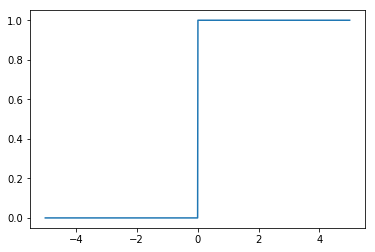

In [6]:
x = np.arange(-5, 5, 0.01)
step_fn=[1 if i>0 else 0 for i in x]

plt.plot(x,step_fn)

# Logistic Regression as an Artifical Neuron

Logistic regression is a model of the form
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
that can be interpreted as a neuron that uses the *sigmoid* as the activation function. It encodes the idea of a neuron firing if the inputs exceed a threshold, makes make the activation function "smooth".

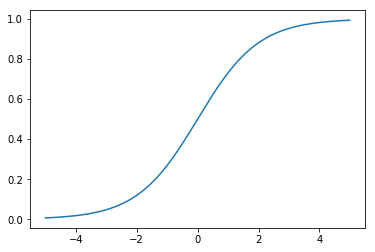

In [7]:
x = np.arange(-5, 5, 0.01)
sigma = 1/(1+np.exp(-x))

plt.plot(x, sigma)

# Activation Functions

There are many other activation functions that can be used. In practice, these two work better than the sigmoid:
* Hyperbolic tangent (`tanh`): $\sigma(z) = \tanh(z)$
* Rectified linear unit (`ReLU`): $\sigma(z) = \max(0, z)$
<!-- * Leaky `ReLU`: $$\sigma(z) = \max(\alpha z, z),$$ where $\alpha$ is a small constant such as 0.1. -->

We can easily visualize these.

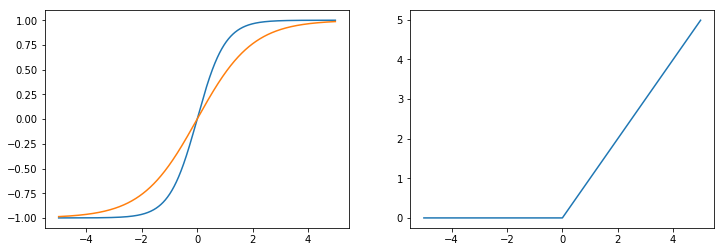

In [15]:
x = np.arange(-5, 5, 0.01)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, np.tanh(x))
plt.plot(x,1/(1+np.exp(-x))*2-1)
plt.subplot(122)
plt.plot(x, np.maximum(x, 0))

In [17]:
from sklearn.datasets import load_digits

data=load_digits()
X=data['data']
y=data['target']

In [18]:
X.shape

(1797, 64)

0


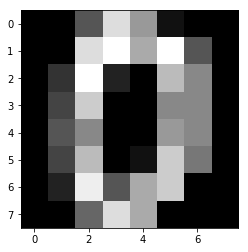

In [21]:
plt.imshow(X[0].reshape(8,8),cmap=plt.cm.binary_r)
print(y[0])

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [46]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(activation='logistic',hidden_layer_sizes=(100,50))
model.fit(X_train,y_train)

C:\Software\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [47]:
pred=model.predict(X_test)
np.mean(pred==y_test)

0.9844444444444445

In [50]:
for W in model.coefs_:
    print(W.shape)

(64, 100)
(100, 50)
(50, 10)


In [38]:
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression()
logit.fit(X_train,y_train)

C:\Software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
pred=logit.predict(X_test)
np.mean(pred==y_test)

0.9533333333333334

# Reference

Machine Learning (Stanford University @ Coursera) https://www.coursera.org/learn/machine-learning

Applied Machine Learning (Cornell University) https://cornelltech.github.io/cs5785-fall-2019/
